In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
patientdata = pd.read_csv('dataset_diabetes/diabetic_data.csv')

In [4]:
patientdata.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
patientdata.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [6]:
patientdata.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [7]:
patientdata.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

**Notice that the weight and age are both given as ranges rather than a discrete value**

## Replace the codes with their values

In [8]:
data = patientdata.copy()

In [9]:
data.admission_type_id.replace(list(range(1,9)),['Emergency','Urgent','Elective','Newborn','Not Available','NULL','Trauma Center','Not Mapped'], inplace=True)
data.admission_type_id.head(5)

0         NULL
1    Emergency
2    Emergency
3    Emergency
4    Emergency
Name: admission_type_id, dtype: object

In [10]:
dischargeDispositionID_list = ['Discharged to home',
'Discharged/transferred to another short term hospital',
'Discharged/transferred to SNF',
'Discharged/transferred to ICF',
'Discharged/transferred to another type of inpatient care institution',
'Discharged/transferred to home with home health service',
'Left AMA',
'Discharged/transferred to home under care of Home IV provider',
'Admitted as an inpatient to this hospital',
'Neonate discharged to another hospital for neonatal aftercare',
'Expired',
'Still patient or expected to return for outpatient services',
'Hospice / home',
'Hospice / medical facility',
'Discharged/transferred within this institution to Medicare approved swing bed',
'Discharged/transferred/referred another institution for outpatient services',
'Discharged/transferred/referred to this institution for outpatient services',
'NULL',
'Expired at home. Medicaid only, hospice.',
'Expired in a medical facility. Medicaid only, hospice.',
'Expired, place unknown. Medicaid only, hospice.',
'Discharged/transferred to another rehab fac including rehab units of a hospital .',
'Discharged/transferred to a long term care hospital.',
'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
'Not Mapped',
'Unknown/Invalid',
'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
'Discharged/transferred to a federal health care facility.',
'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
'Discharged/transferred to a Critical Access Hospital (CAH).']

data.discharge_disposition_id.replace(list(range(1,len(dischargeDispositionID_list)+1)),dischargeDispositionID_list, inplace=True)
data.discharge_disposition_id.head()

0            Not Mapped
1    Discharged to home
2    Discharged to home
3    Discharged to home
4    Discharged to home
Name: discharge_disposition_id, dtype: object

In [11]:
admissionSourceID_list = ['Physician Referral',
'Clinic Referral',
'HMO Referral',
'Transfer from a hospital',
'Transfer from a Skilled Nursing Facility (SNF)',
'Transfer from another health care facility',
'Emergency Room',
'Court/Law Enforcement',
'Not Available',
'Transfer from critial access hospital',
'Normal Delivery',
'Premature Delivery',
'Sick Baby',
'Extramural Birth',
'Not Available',
'NULL',
'Transfer From Another Home Health Agency',
'Readmission to Same Home Health Agency',
'Not Mapped',
'Unknown/Invalid',
'Transfer from hospital inpt/same fac reslt in a sep claim',
'Born inside this hospital',
'Born outside this hospital',
'Transfer from Ambulatory Surgery Center',
'Transfer from Hospice']

data.admission_source_id.replace(list(range(1,len(admissionSourceID_list)+1)),admissionSourceID_list, inplace=True)
data.admission_source_id.head()

0    Physician Referral
1        Emergency Room
2        Emergency Room
3        Emergency Room
4        Emergency Room
Name: admission_source_id, dtype: object

In [12]:
# count the number of rows for each type
data.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

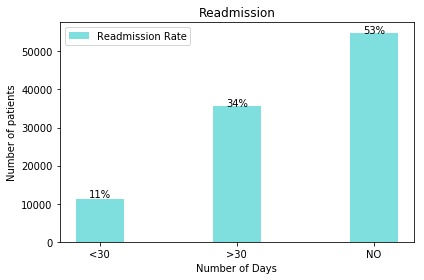

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 3

Zipf_Values = (11357, 35545, 54864)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, Zipf_Values, bar_width, color='c', 
    label='Readmission Rate', alpha= 0.5)

plt.xlabel('Number of Days')
plt.ylabel('Number of patients')
plt.title('Readmission')
plt.xticks(index , ('<30', '>30', 'NO'))
plt.legend()

test_values = [11.16, 34.93, 53.91]
i = 0
for rect in rects1:
    height = test_values[i]
    h_rect = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*h_rect,
            '%d' % int(height) + "%", ha='center', va='bottom')
    i += 1

plt.tight_layout()
plt.show()

Around 11% of the population is rehospitalized. This represented an imbalanced classification problem so we will address that below.

In [14]:
# replace ? with nan
data = data.replace('?',np.nan)

In [15]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [16]:
data.shape

(101766, 50)

In [17]:
# Impute missing categorical values
data['race'] = data['race'].fillna('UNKNOWN')
data['payer_code'] = data['payer_code'].fillna('UNKNOWN')
data['medical_specialty'] = data['medical_specialty'].fillna('UNKNOWN')
#data[data['diag_3'] == '?'].shape[0] * 1.0 / data.shape[0]

In [18]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Use of Repaglinide and Insulin appear to increase the odds of readmission while Chlorpropamide usage decreases the odds. But, the usage of these drugs can be very situation specific so it is hard to make conclusions about specific drugs here.

In [19]:
data[['age', 'weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


In [20]:
data.groupby('age').size()

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64

In [21]:

"""age_id = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_group'] = df.age.replace(age_id)"""

"age_id = {'[0-10)':0, \n          '[10-20)':10, \n          '[20-30)':20, \n          '[30-40)':30, \n          '[40-50)':40, \n          '[50-60)':50,\n          '[60-70)':60, \n          '[70-80)':70, \n          '[80-90)':80, \n          '[90-100)':90}\ndf['age_group'] = df.age.replace(age_id)"

In [22]:
#[(data['readmitted'] == 'NO') | (data['readmitted'] == '>30')]

import seaborn as sns
g = sns.catplot(x='gender', 
                   y='age_group', 
                   data=df, 
                   kind='bar',
                   #hue='readmitted' # Color by stage
                   col='readmitted'  # Separate by stage
                   #kind='swarm'
               )

In [23]:
# We can see that there are three types of values:- 'NO','<30','>30'. So, to make it a categorical variable so that different  
# ML techniques can be applies.

data['<30readmit'] = np.where(np.logical_or(np.equal(data['readmitted'],'NO'),np.equal(data['readmitted'], '>30')), 
    0, 1)


patientdata['<30readmit'] = np.where(np.logical_or(np.equal(data['readmitted'],'NO'),np.equal(patientdata['readmitted'], '>30')), 
    0, 1)

In [24]:
data['<30readmit'].sum()

11357

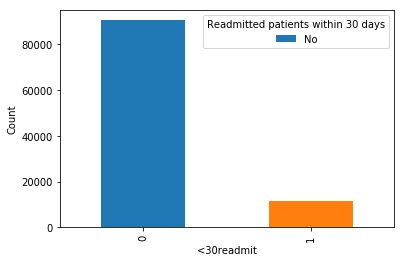

In [25]:
# plot 'readmitted' again to see the change
data.groupby('<30readmit').size().plot(kind='bar')
plt.ylabel('Count')
plt.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
#c / c.groupby(level=0).sum()

In [26]:
data.groupby('<30readmit').size()

<30readmit
0    90409
1    11357
dtype: int64

In [27]:
11357/(90409+11357)

0.11159915885462728

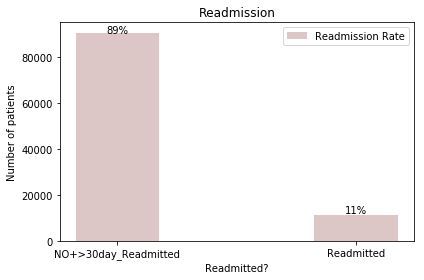

In [28]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 2

Zipf_Values = (90409, 11357)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, Zipf_Values, bar_width, color='rosybrown', 
    label='Readmission Rate', alpha= 0.5)

plt.xlabel('Readmitted?')
plt.ylabel('Number of patients')
plt.title('Readmission')
plt.xticks(index , ('NO+>30day_Readmitted', 'Readmitted'))
plt.legend()

test_values = [89, 11]
i = 0
for rect in rects1:
    height = test_values[i]
    h_rect = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*h_rect,
            '%d' % int(height) + "%", ha='center', va='bottom')
    i += 1

plt.tight_layout()
plt.show()

In [29]:
df = data.copy()

# EDA

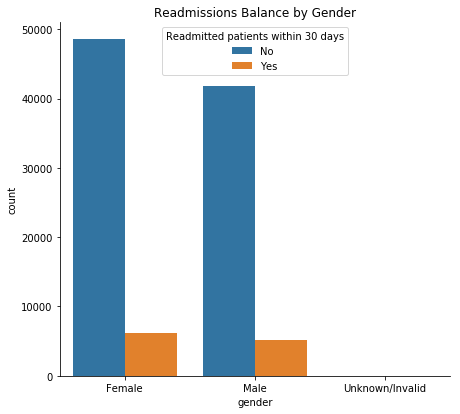

In [30]:
# #Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

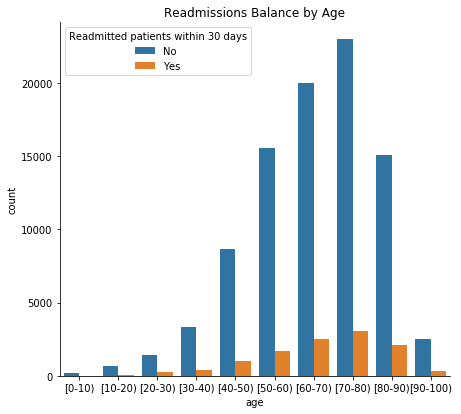

In [31]:
#age and Readmissions,
plot1 = sns.countplot(x = 'age', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Age')
plt.show()

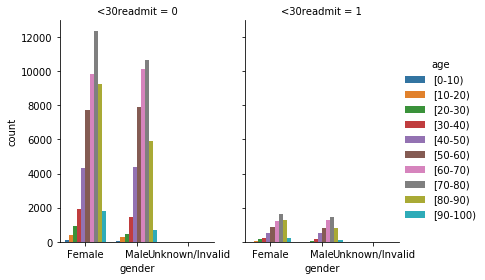

In [32]:
g = sns.catplot(x="gender", hue="age", col="<30readmit",
                data=patientdata, kind="count",
                height=4, aspect=.7);

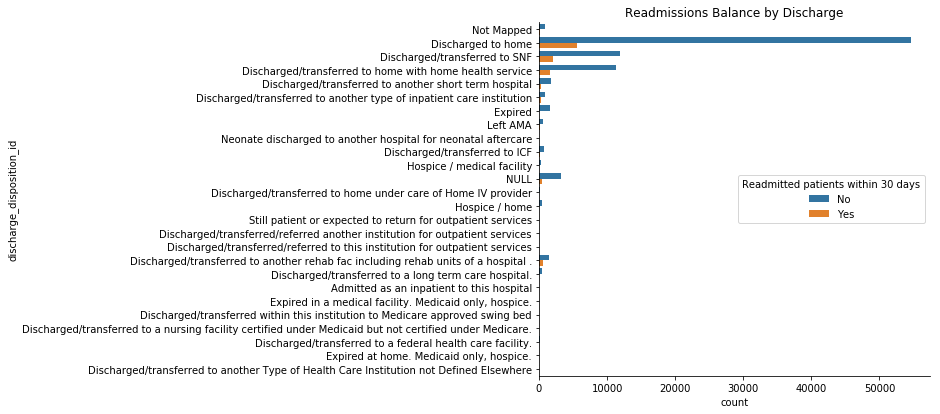

In [33]:
# #Gender and Readmissions,
plot1 = sns.countplot(y = 'discharge_disposition_id', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Discharge')

plt.show()

The strongest predictors of readmission within 30 days appear to be four types of discharge conditions in both versions. Intuitively, these make sense — transfer to another unit in a hospital or another hospital may indicate higher severity/complexity of disease and make readmission likely.
Interestingly, patients who Left Against Medical Advice (LAMA) are also likely to be readmitted, perhaps because their condition was not fit for discharge in the first place.

In [34]:
patientdata['discharge'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in patientdata['discharge_disposition_id']], index=patientdata.index)


In [35]:
patientdata.groupby('discharge').size()

discharge
Home               60234
Other discharge    41532
dtype: int64

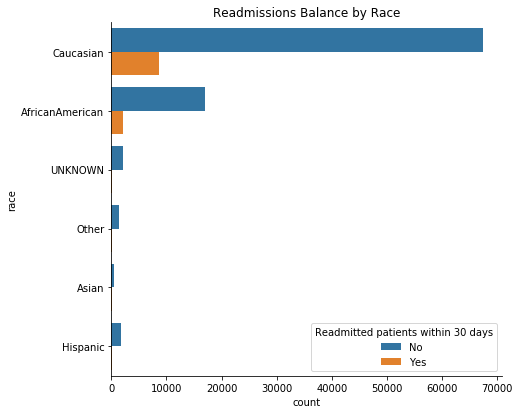

In [36]:
#Race and Readmissions,
plot1 = sns.countplot(y = 'race', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Race')
plt.show()

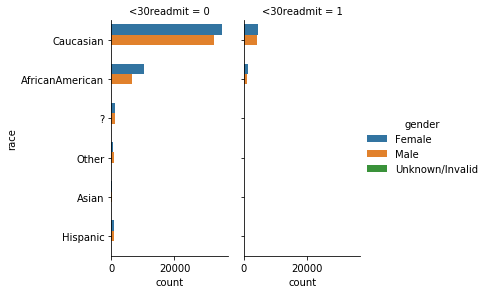

In [37]:
g = sns.catplot(y="race", hue="gender", col="<30readmit",
                data=patientdata, kind="count",
                height=4, aspect=.7);

The effect of race being African American is another example where caution must be exercised in interpretation and conclusion. It would be not appropriate to assume differential treatment based on race because it could be very well due to environmental, genetic or other factors that we have not even measured here.

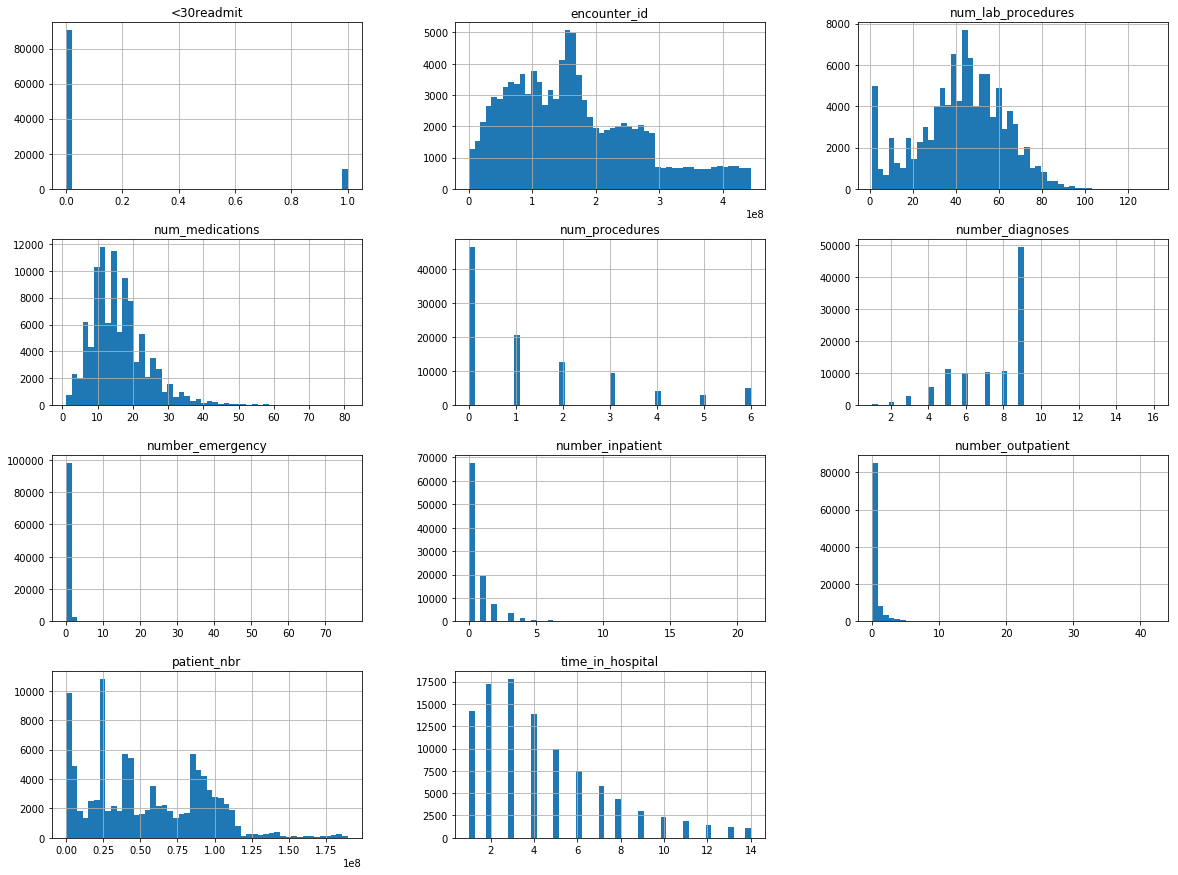

In [38]:
#Plotting the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

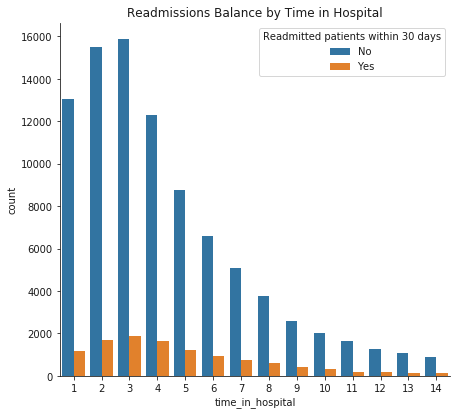

In [39]:
#Readmitted and Time in hospital,
sns.set_color_codes("pastel")
plot1 = sns.countplot(x = 'time_in_hospital', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Time in Hospital')
plt.show()

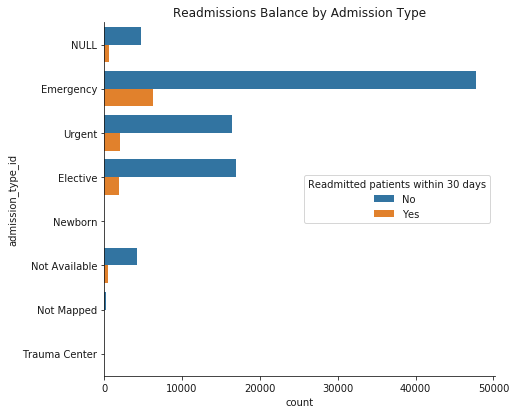

In [40]:
#Readmitted and Time in hospital,
sns.set_color_codes("pastel")
plot1 = sns.countplot(y = 'admission_type_id', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Admission Type')
plt.show()

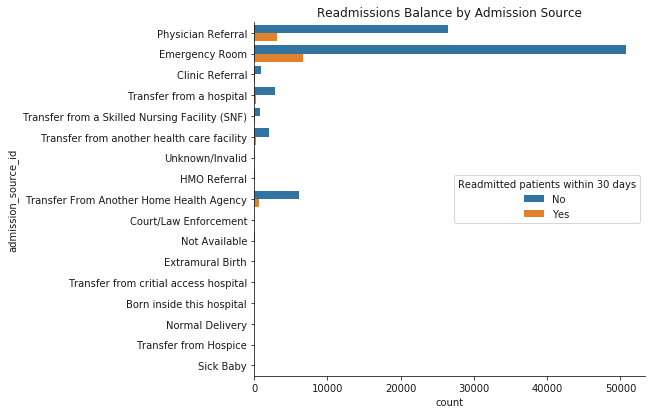

In [41]:

#Readmitted and Time in hospital,
sns.set_color_codes("pastel")
plot1 = sns.countplot(y = 'admission_source_id', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Admission Source')
plt.show()

/Users/anupriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


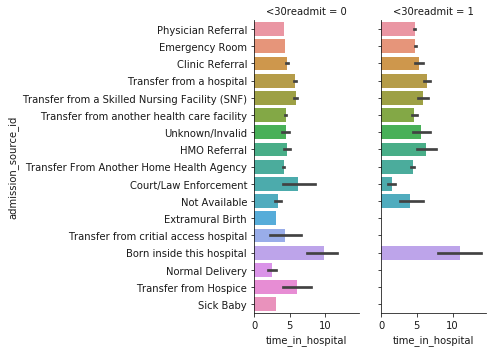

In [42]:
g = sns.catplot(x="time_in_hospital", y="admission_source_id", col="<30readmit", 
                data=data, kind="bar",
                height=5, aspect=.7);

/Users/anupriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


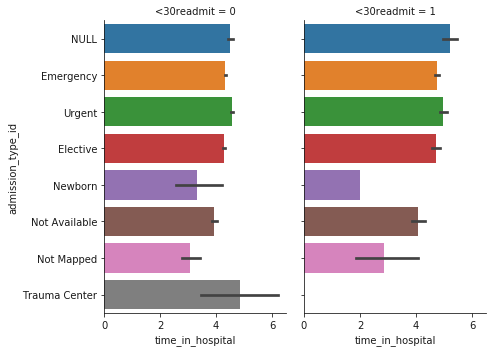

In [43]:
g = sns.catplot(x="time_in_hospital", y="admission_type_id", col="<30readmit", 
                data=data, kind="bar",
                height=5, aspect=.7);

/Users/anupriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


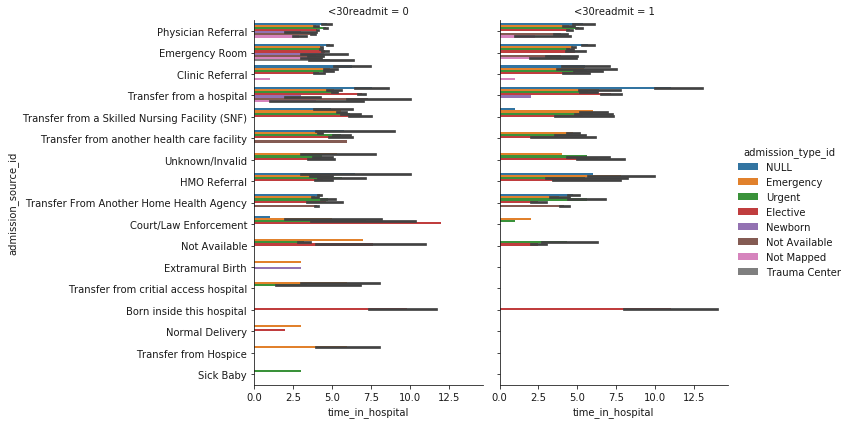

In [44]:
g = sns.catplot(x="time_in_hospital", y="admission_source_id", col="<30readmit", 
                hue = "admission_type_id",
                data=data, kind="bar",
                height=6, aspect=.9);

but time spent in hospital is the most important feature when using decision tree. However, visualizing the tree shows that both of these features appear above/below each other, which indicates high interaction. One might then include this interaction term in the logistic model and see improvement. For a hospital manager, this means that patients who are likely to stay longer and then get discharged to another unit, are highly likely to get readmitted.

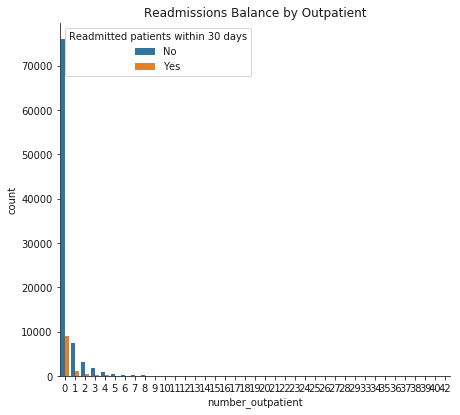

In [45]:
#Readmitted and Time in hospital,
subset1 = data.copy()
subset1.loc[subset1['number_outpatient'] != 1]
plot1 = sns.countplot(x = 'number_outpatient', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Outpatient')
plt.show()

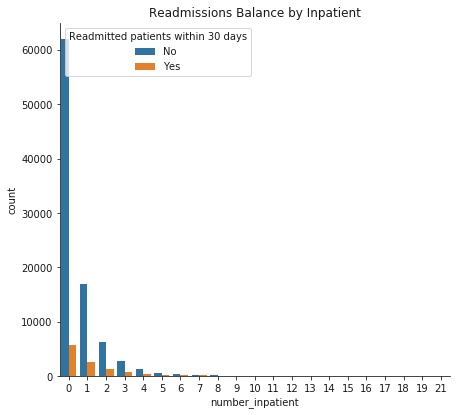

In [46]:
#Readmitted and Time in hospital,
subset1 = data.copy()
subset1.loc[subset1['number_inpatient'] != 1]
plot1 = sns.countplot(x = 'number_inpatient', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Inpatient')
plt.show()

A preliminary analysis of our numerical features revealed that many of these were highly skewed and had high kurtosis. EG NUMBER_INPATIENT, NUMBER_OUTPATIENT

Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. 

Number of medication used: Another possibly related factor could be the total number of medications used by the patient (which may indicate severity of their condition and/or the intensity of care).




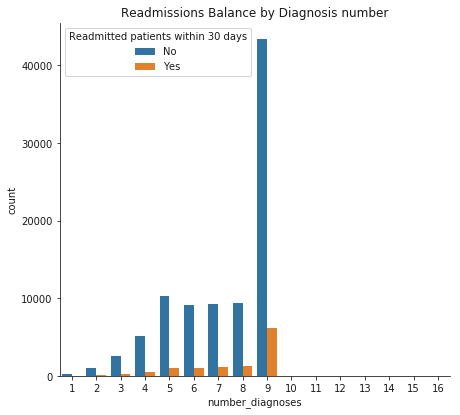

In [47]:
#Readmitted and Time in hospital,

plot1 = sns.countplot(x = 'number_diagnoses', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Diagnosis number')
plt.show()

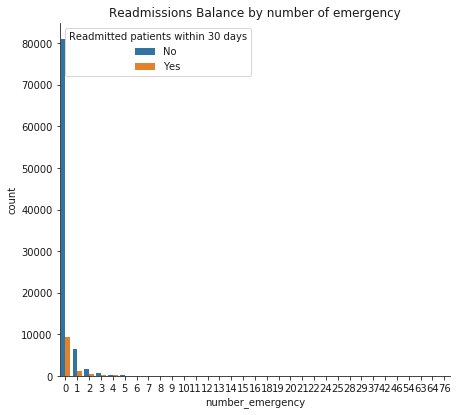

In [48]:
#Readmitted and Time in hospital,

plot1 = sns.countplot(x = 'number_emergency', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by number of emergency')
plt.show()

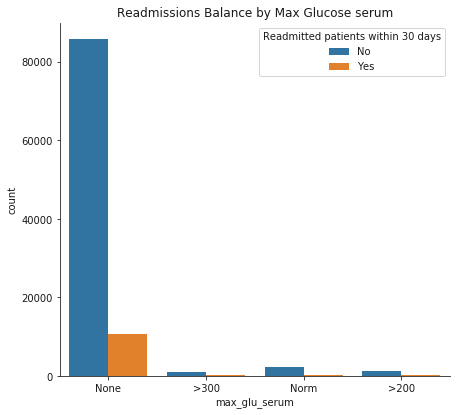

In [49]:
#Readmitted and Time in hospital,

plot1 = sns.countplot(x = 'max_glu_serum', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Max Glucose serum')
plt.show()

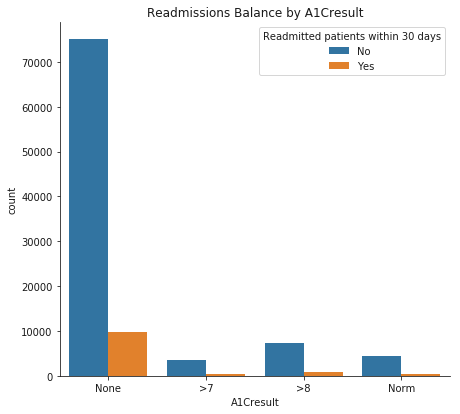

In [50]:
#Readmitted and Time in hospital,

plot1 = sns.countplot(x = 'A1Cresult', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by A1Cresult')
plt.show()

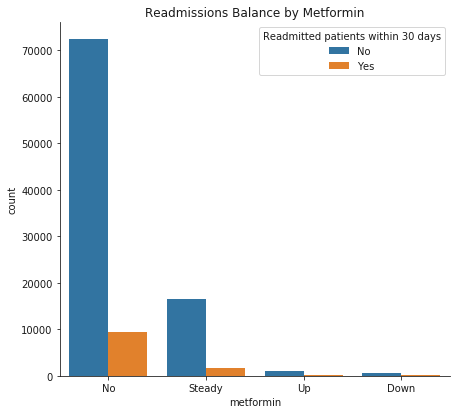

In [51]:
#Readmitted and Time in hospital,

plot1 = sns.countplot(x = 'metformin', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Metformin')
plt.show()

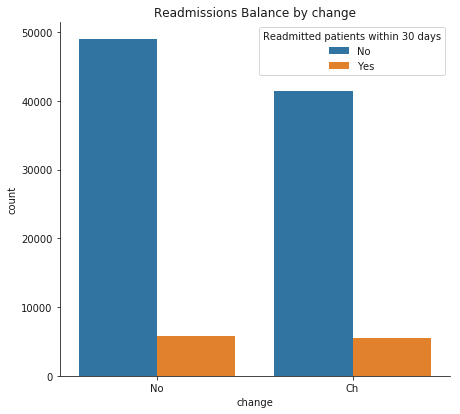

In [52]:
#Readmitted and Time in hospital,

plot1 = sns.countplot(x = 'change', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by change')
plt.show()

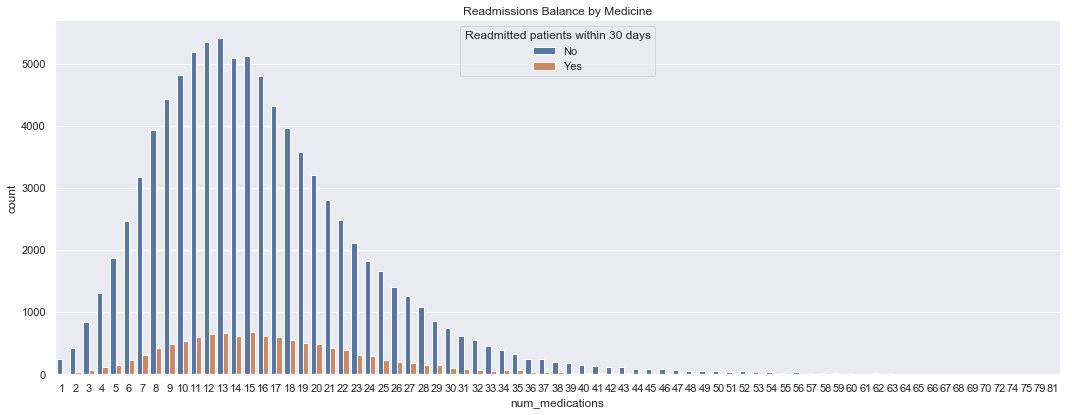

In [101]:
#Readmitted and Time in hospital,

plot1 = sns.countplot(x = 'num_medications', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(18, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Medicine')
plt.show()

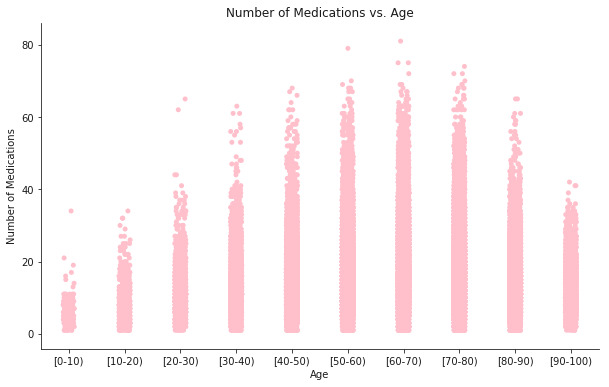

In [54]:
#Let's try to see how the age and number of medicines vary,
sortage = data.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'pink')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

References:
https://github.com/AkankshaUtreja/Diabetic-Patients-Readmission-Prediction/blob/master/Practicum2.ipynb
        

In [55]:
print('Number of columns:',len(data.columns))

Number of columns: 51


In [56]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

df[cols_cat_num] = df[cols_cat_num].astype('str')

In [57]:
cols_cat = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code']

In [58]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num + ['medical_specialty']],drop_first = True)

In [59]:
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNKNOWN,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_UNKNOWN,medical_specialty_Urology
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
df = pd.concat([df,df_cat], axis = 1)
df.tail(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_UNKNOWN,medical_specialty_Urology
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,Emergency,Discharged/transferred to SNF,Emergency Room,3,...,0,0,0,0,0,0,0,0,1,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),5,...,0,0,0,0,0,0,0,0,1,0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,Emergency,Discharged to home,Emergency Room,1,...,0,0,0,0,0,0,0,0,1,0
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,Urgent,Discharged/transferred to SNF,Emergency Room,10,...,0,0,0,0,0,0,0,0,0,0
101765,443867222,175429310,Caucasian,Male,[70-80),NaN,Emergency,Discharged to home,Emergency Room,6,...,0,0,0,0,0,0,0,0,1,0


In [61]:
cols_all_cat = list(df_cat.columns)

/Users/anupriya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


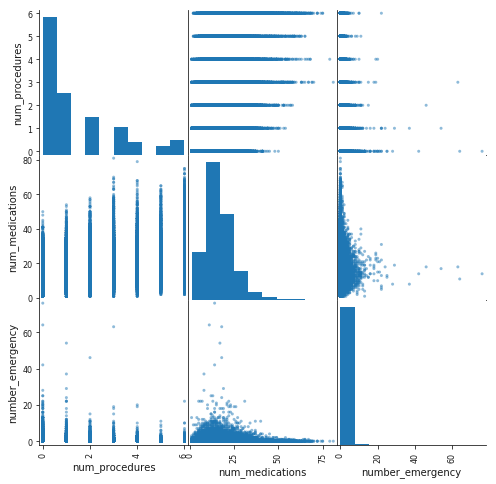

In [62]:
# Let's see the relationship between different variables to understand the data and if there is a strong correlation between 
#two variables then we can consider one of them.
import seaborn as sns
sm = pd.scatter_matrix(data[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

From the above, we can see that there is no problem of multi-collinearity. We can also see that as the number_emergency increases the num_medication decreases.

/Users/anupriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/anupriya/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/anupriya/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/anupriya/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

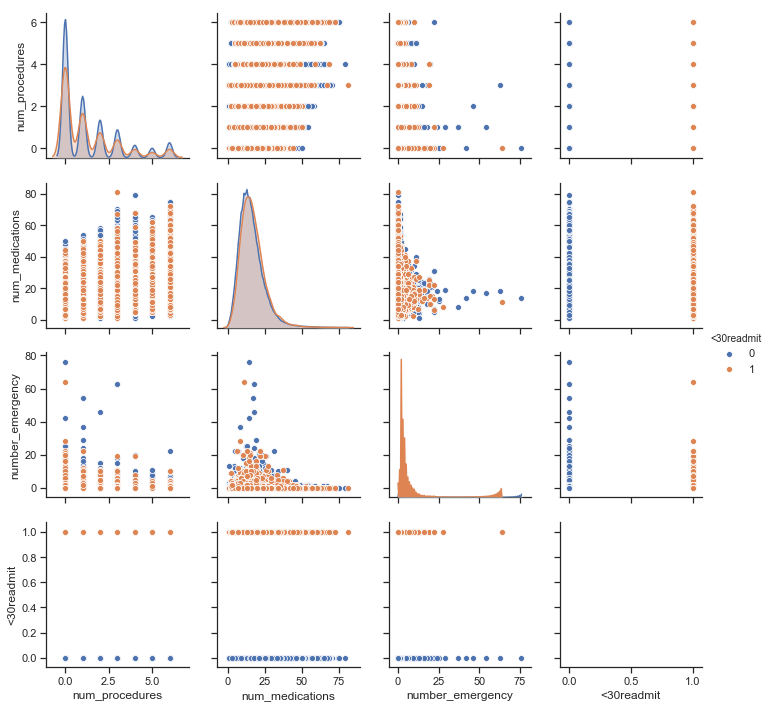

In [63]:
import seaborn as sns
sns.set(style="ticks")
subset1 = data[['num_procedures', 'num_medications', 'number_emergency', '<30readmit']]
sns.pairplot(subset1, hue="<30readmit")

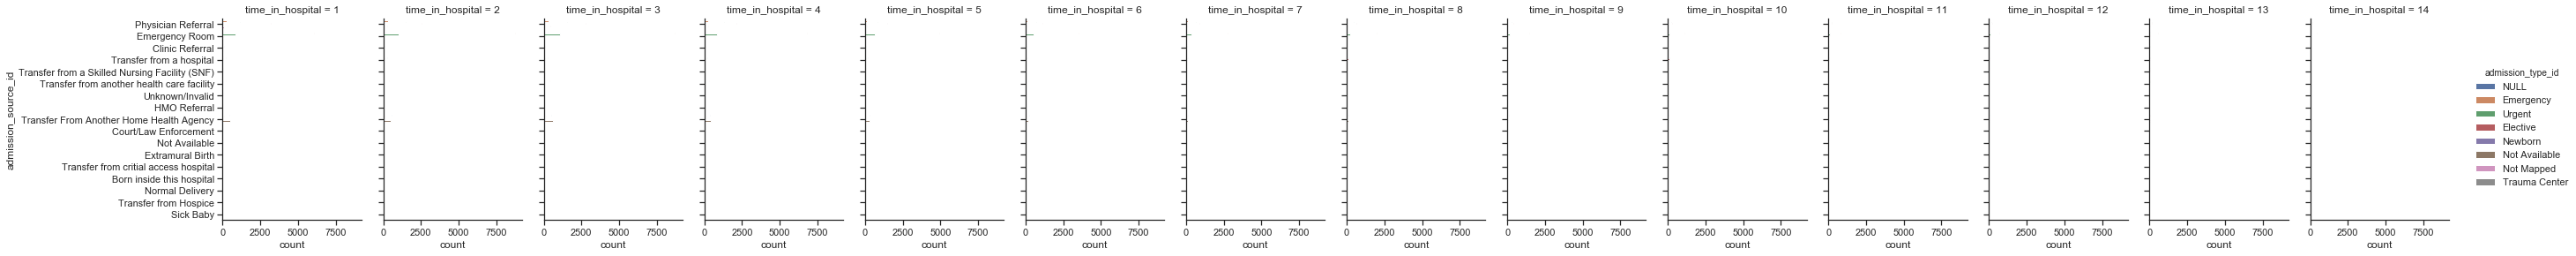

In [64]:


g = sns.catplot(y="admission_source_id", hue="admission_type_id", col="time_in_hospital",
                data=data, kind="count",
                height=4, aspect=.7);

For example, in both models the most important feature is number_inpatient, which is the number of inpatient visits in the last year. This means that if patients have been to the hospital in the last year they are more likely to be re-hospitalized again. This might inspire you to get (if you have it) more data about their prior admissions.Another example is discharge_disposition_id_22 which is used if a patient is discharged to a rehab facility. For your company, you might be able to research rules for being discharged to a rehab facility and add features related to those rules. Since most of the data analysts / data scientists won't have the deep domain knowledge. I probably would take a few of these features to other experts (e.g. doctors) and ask them about the medications.

For example, I built a model based on the doctor's discharge notes. When I performed this same analysis on the most important words, I discovered that the top word for predicting someone would not be re-admitted was 'death'. This made me realize that I made a mistake and forgot to exclude patients who expired in the current hospital visit. Learning from my mistakes, I had you exclude the discharge codes related to death. Similar things can also happen when you merge datasets. Perhaps when you merged the datasets one of the classes ended up with nan for some of the variables. The analysis above will help you catch some of these cases.

https://github.com/andrewwlong/diabetes_readmission/blob/master/diabetes_project.ipynb

In [65]:
condition = {"Neoplasms": np.arange(140, 240).tolist()
    , "Diabtes": [250]
    , "Circulatory": np.append(785, np.arange(390, 460)).tolist()
    , "Respiratory": np.append(786, np.arange(460, 520)).tolist()
    , "Digestive": np.append(787, np.arange(520, 580)).tolist()
    , "Genitourinary": np.append(788, np.arange(580, 630)).tolist()
    , "Musculoskeletal": np.arange(710, 740).tolist()
    , "Injury": np.arange(800, 1000).tolist()
             }
# reverse the condition dictionary
conditionrvs = {np.str(value): key for key, values in condition.items() for value in values}
data.diag_1 = data.diag_1.replace(conditionrvs.keys(), conditionrvs.values())
data.diag_1[~data.diag_1.isin(condition.keys())] = np.nan
data.diag_1 = data.diag_1.fillna("Other")
data.diag_1.value_counts(1)*100

/Users/anupriya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Circulatory        29.908810
Other              26.251400
Respiratory        14.172710
Digestive           9.310575
Injury              6.852976
Genitourinary       5.028202
Musculoskeletal     4.870979
Neoplasms           3.373425
Diabtes             0.230922
Name: diag_1, dtype: float64

Text(0.5,1,'Readmissions Balance by Diagnosis 1')

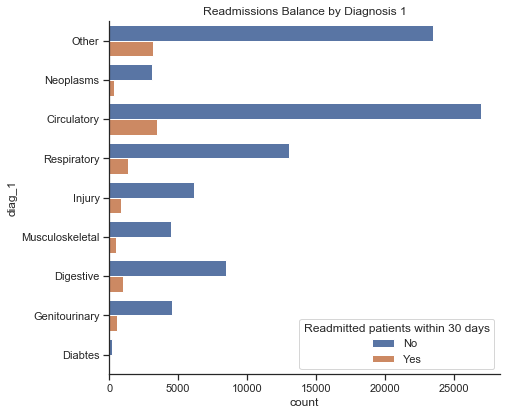

In [66]:
# Readmission and Diag_1,
plot1 = sns.countplot(y = 'diag_1', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Diagnosis 1')

In [67]:

data.diag_2 = data.diag_2.replace(conditionrvs.keys(), conditionrvs.values())
data.diag_2[~data.diag_2.isin(condition.keys())] = np.nan
data.diag_2 = data.diag_2.fillna("Other")
data.diag_2.value_counts(1)*100


/Users/anupriya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Other              33.050331
Circulatory        31.327752
Respiratory        10.705933
Genitourinary       8.230647
Diabtes             5.965647
Digestive           4.097636
Neoplasms           2.502801
Injury              2.385866
Musculoskeletal     1.733388
Name: diag_2, dtype: float64

Text(0.5,1,'Readmissions Balance by Diagnosis 2')

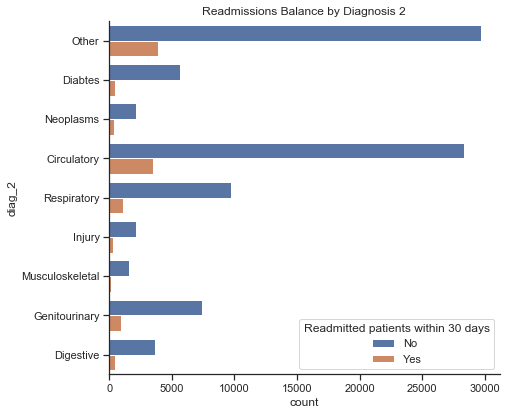

In [68]:
# Readmission and Diag_1,
plot1 = sns.countplot(y = 'diag_2', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Diagnosis 2')

In [69]:

data.diag_3 = data.diag_3.replace(conditionrvs.keys(), conditionrvs.values())
data.diag_3[~data.diag_3.isin(condition.keys())] = np.nan
data.diag_3 = data.diag_3.fillna("Other")
data.diag_3.value_counts(1)*100

/Users/anupriya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Other              35.591455
Circulatory        29.780084
Diabtes            11.354480
Respiratory         7.230313
Genitourinary       6.564078
Digestive           3.861801
Injury              1.912230
Musculoskeletal     1.881768
Neoplasms           1.823792
Name: diag_3, dtype: float64

Text(0.5,1,'Readmissions Balance by Diagnosis 3')

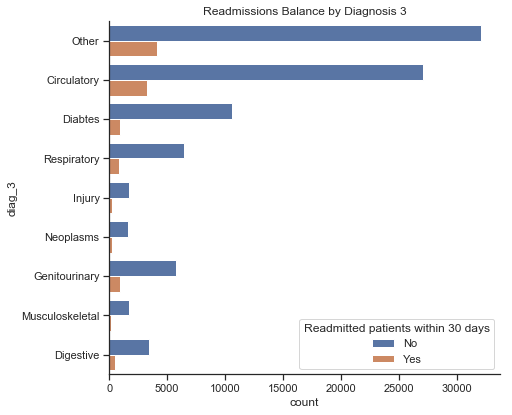

In [70]:
# Readmission and Diag_1,
plot1 = sns.countplot(y = 'diag_3', hue = '<30readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Diagnosis 3')

/Users/anupriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


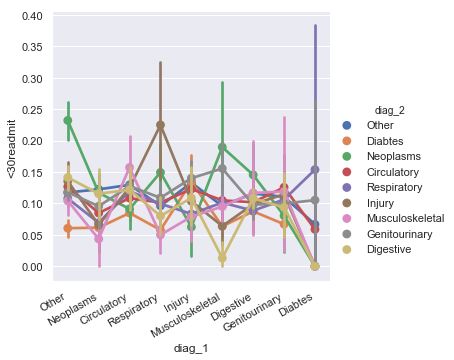

In [95]:
ax = sns.catplot(x='diag_1',y='<30readmit',hue='diag_2',kind='point',data=data)
ax.fig.autofmt_xdate()

/Users/anupriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


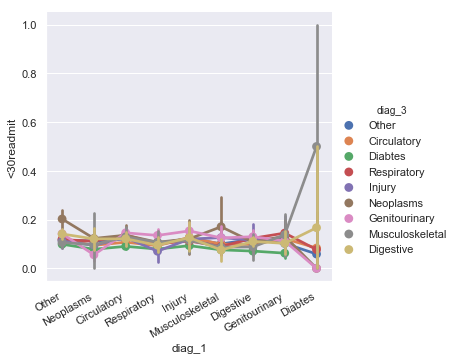

In [84]:
ax = sns.catplot(x='diag_1',y='<30readmit',hue='diag_3',kind='point',data=data)
ax.fig.autofmt_xdate()

/Users/anupriya/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


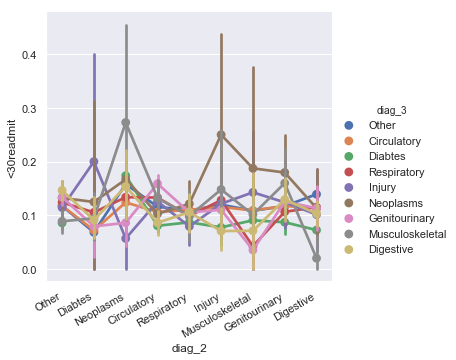

In [85]:
ax = sns.catplot(x='diag_2',y='<30readmit',hue='diag_3',kind='point',data=data)
ax.fig.autofmt_xdate()

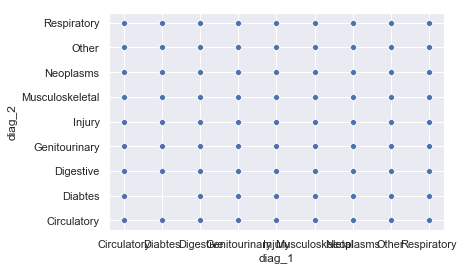

In [81]:
sns.scatterplot(x='diag_1',y='diag_2',data=data)

In [113]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       '<30readmit'],
      dtype='object')

In [121]:
data_med = data[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone','<30readmit']]

In [122]:
data_med.head(5)

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,<30readmit
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,Up,No,No,No,No,No,0
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,0
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,Up,No,No,No,No,No,0
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,Steady,No,No,No,No,No,0


In [126]:
[data_med.iloc[:,0:25].isin(["NO"])]

[        metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  \
 0           False        False        False           False        False   
 1           False        False        False           False        False   
 2           False        False        False           False        False   
 3           False        False        False           False        False   
 4           False        False        False           False        False   
 5           False        False        False           False        False   
 6           False        False        False           False        False   
 7           False        False        False           False        False   
 8           False        False        False           False        False   
 9           False        False        False           False        False   
 10          False        False        False           False        False   
 11          False        False        False           False        False   

In [129]:
#data_med = data_med.where(data_med != 'No', 1)
data_med['diabetic_medication_count'] = 23 - data_med.iloc[:,0:22].isin(["No"]).sum(1)
data_med.head(15)

/Users/anupriya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,<30readmit,diabetic_medication_count
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,0,1
1,No,No,No,No,No,No,No,No,No,No,...,No,No,Up,No,No,No,No,No,0,2
2,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,0,2
3,No,No,No,No,No,No,No,No,No,No,...,No,No,Up,No,No,No,No,No,0,2
4,No,No,No,No,No,No,Steady,No,No,No,...,No,No,Steady,No,No,No,No,No,0,3
5,No,No,No,No,No,No,No,No,No,No,...,No,No,Steady,No,No,No,No,No,0,2
6,Steady,No,No,No,Steady,No,No,No,No,No,...,No,No,Steady,No,No,No,No,No,0,4
7,No,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,0,2
8,No,No,No,No,No,No,Steady,No,No,No,...,No,No,Steady,No,No,No,No,No,0,3
9,No,No,No,No,No,No,No,No,No,No,...,No,No,Steady,No,No,No,No,No,0,3


Text(0.5,1,'Readmissions Balance by Diabetic Medication Count')

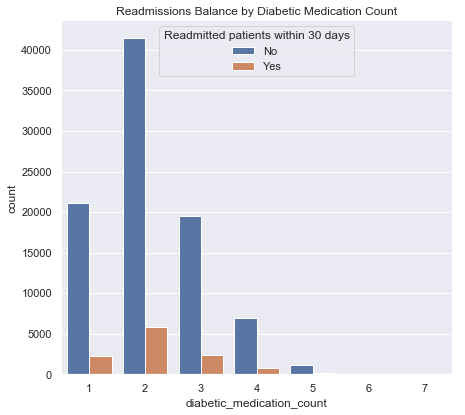

In [131]:
plot1 = sns.countplot(x = 'diabetic_medication_count', hue = '<30readmit', data = data_med) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients within 30 days', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Diabetic Medication Count')

In [77]:
sns.set(style="darkgrid")
#tips = sns.load_dataset("tips")              #tips is inbuild dataset in seaborn
sns.swarmplot(x="diag_1", y="diag_2", data=data);

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
data.columns

How to deal with 'diag_1', 'diag_2', and 'diag_3'?
Based on the results found in Reference[1], we know that:
The statistical model suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the primary diagnosis.
The only medication that varied significantly across the patients was the delivery of insulin, while other medications remained common among all the patients.
It may not be surprising that the attention given to diabetes care in individuals with admitting diagnoses of circulatory or respiratory diseases may have been less than those with a primary diagnosis of diabetes mellitus.
Greater attention to diabetes care during the hospitalization for these high-risk individuals may have a significant impact on readmission.
The primary, secondary, and third medical diagnoses are marked by the ICD9 codes.
ICD9 code for diabetes: 250.xx

Six major features are found to have high impact on diabetes patient readmission: number of lab procedures, number of medications administrated during the encounter, time spent in hospital, number of procedures other than lab tests, number of diagnoses, and number of inpatient visits.
The logistic regression classifier modeling achieves 0.62 accuracy and 0.66 AUC score. The sensitivity of the modeling can be increased by adjusting the classification threshold.
To correctly predict the readmission and avoid extra cost, hospitals should carefully examine the clinical data of patients and pay special attention to the above major features.
Some other features might be worth collecting, for example, date of admission and family history.
This analytic method can be applied to different diseases other than diabetes.

https://github.com/swengzju/Predicting-Diabetes-Patient-Readmission/blob/master/Predicting%20Diabetes%20Patient%20Readmission.ipynb
    

In [293]:
#We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

In [295]:
# increase row display limit
pd.options.display.max_rows = 400
# calculate correlation matrix and store as absolute values
c = data.corr().abs()
# unstake the table
s = c.unstack()
# sort the values in descending order
so = s.sort_values(ascending=False)
# display the most relevant part of the list
so[38:120]

number_inpatient    number_outpatient     0.107338
                    number_diagnoses      0.104710
number_diagnoses    number_inpatient      0.104710
encounter_id        number_outpatient     0.103756
number_outpatient   encounter_id          0.103756
                    patient_nbr           0.103379
patient_nbr         number_outpatient     0.103379
number_outpatient   number_diagnoses      0.094152
number_diagnoses    number_outpatient     0.094152
number_emergency    number_outpatient     0.091459
number_outpatient   number_emergency      0.091459
encounter_id        number_emergency      0.082803
number_emergency    encounter_id          0.082803
encounter_id        num_medications       0.076113
num_medications     encounter_id          0.076113
number_diagnoses    num_procedures        0.073734
num_procedures      number_diagnoses      0.073734
time_in_hospital    number_inpatient      0.073623
number_inpatient    time_in_hospital      0.073623
num_procedures      number_inpa

/Users/anupriya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


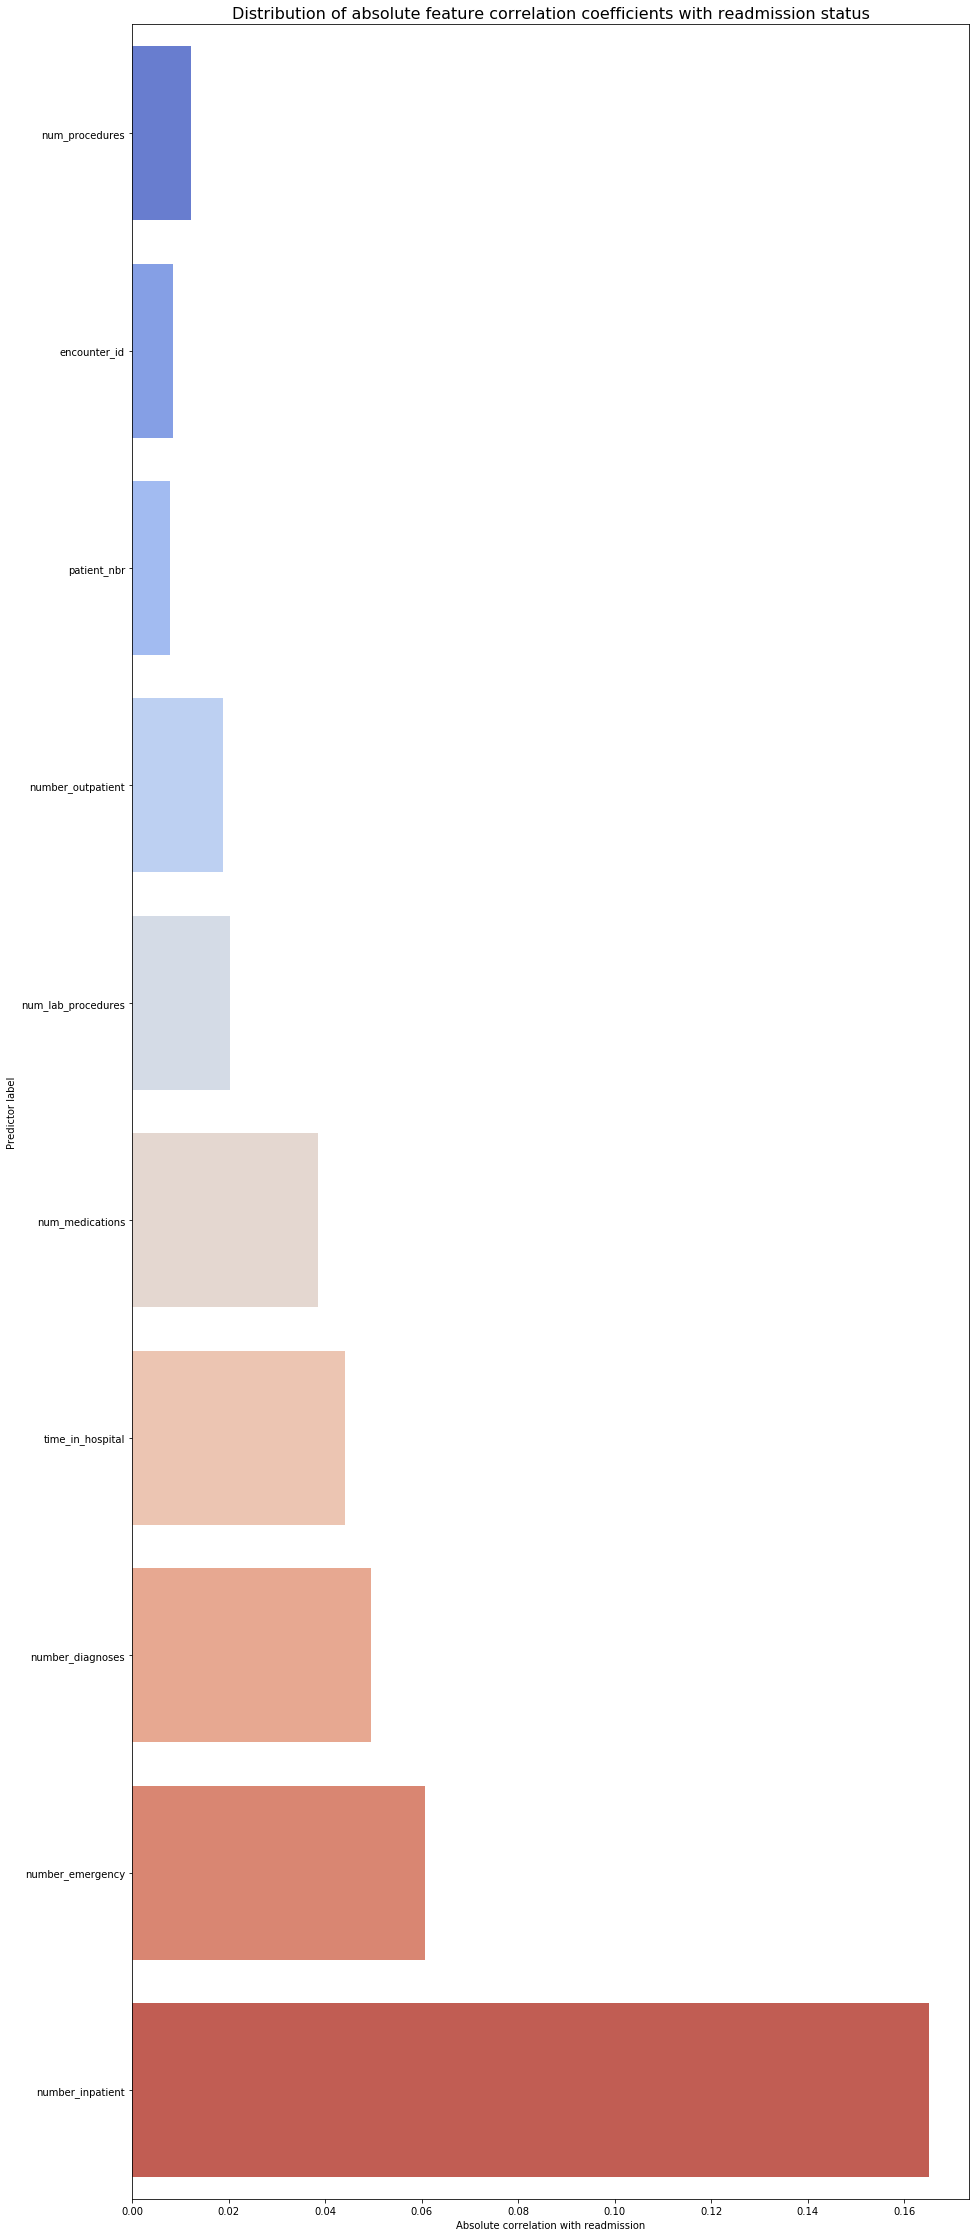

In [341]:
correlations_df = data.corr()
plt.figure(figsize=(15,40))
abs_corr_coef = abs(correlations_df.ix[correlations_df.columns.drop('<30readmit'),'<30readmit'].sort_values())
sns.barplot(abs_corr_coef, abs_corr_coef.index, orient='h', palette=sns.color_palette('coolwarm', len(abs_corr_coef)))
plt.ylabel('Predictor label'); plt.xlabel('Absolute correlation with readmission');
plt.title('Distribution of absolute feature correlation coefficients with readmission status', size=16);